In [33]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('data/ice_cream_sales.csv')

La correlación no tiene sentido 

In [35]:
df.corr()['sales']['price']

0.07554365164568472

Crea X y Y 

In [36]:
target = 'sales'

X = df.drop(target, axis=1)
X['price'] = X['price'].round(0)
y = df[target]

Crea el modelo 

In [37]:
model = xgb.XGBRegressor(max_depth=3, n_estimators=100)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

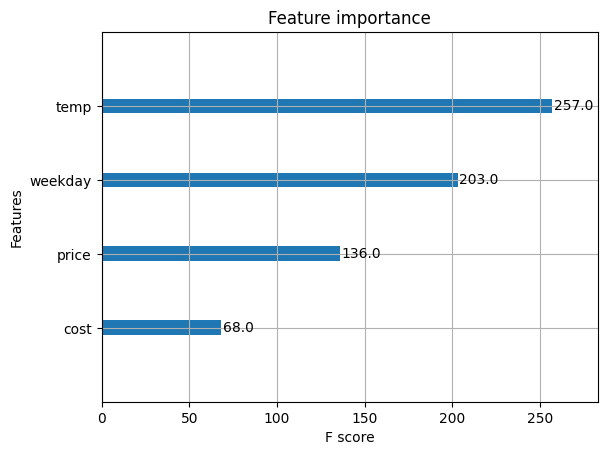

In [38]:
# Plot feature importance
xgb.plot_importance(model)

Distribución del precio

<Axes: >

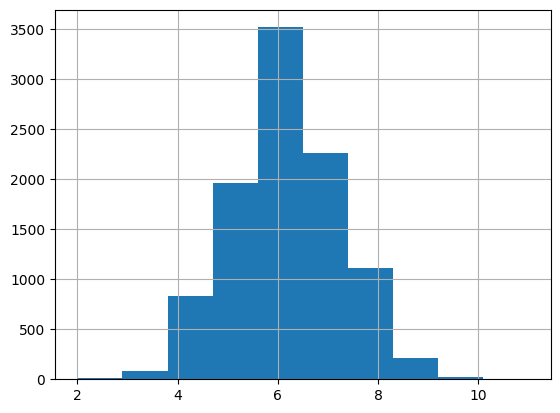

In [39]:
X.price.hist()

# Crea un S Learner

In [40]:
price = [4, 5, 6, 7, 8]
ejemplo = X.iloc[[300]]
ejemplo

,temp,weekday,cost,price
300,26.0,4,0.3,5.0


In [41]:
simulaciones = []
for i in price:
    counterfactual = ejemplo.copy()
    counterfactual['price'] = i
    simulaciones.append(model.predict(counterfactual)[0])

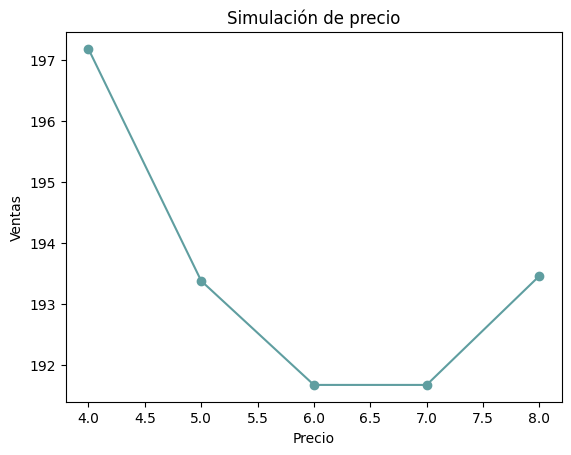

In [42]:
plt.plot(price, simulaciones, marker='o', color='cadetblue')
plt.title('Simulación de precio')
plt.xlabel('Precio')
plt.ylabel('Ventas')
plt.show()

In [43]:
X['price'].value_counts()

price
6.0     3514
7.0     2262
5.0     1956
8.0     1106
4.0      835
9.0      212
3.0       84
10.0      20
2.0        9
11.0       2
Name: count, dtype: int64